Importing modules

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [3]:
!unzip Train_UQcUa52.zip


^C


In [4]:
df =pd.read_csv('train.csv')
df.head()


,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
image_path= 'Images/train/'

In [99]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(
    28, 28, 1), color_mode='grayscale')) for i in tqdm(range(df.shape[0]))]).astype('float32')/255


  0%|          | 0/49000 [00:00<?, ?it/s]

In [21]:
y=df['label']

In [22]:
print(X.shape,y.shape)

(49000, 28, 28, 1) (49000,)


4


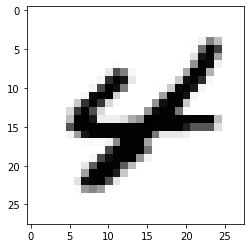

In [23]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),cmap='Greys')

7


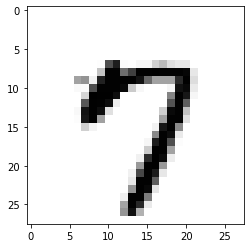

In [24]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),cmap='Greys')

Train-Test split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=np.array(y))

Normalization

In [26]:
x_train /=255
x_test /=255

input_shape = (28, 28, 1)
output_classes = 10

Model Creation

In [114]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(output_classes, activation='softmax'))
# model.add(Dropout(0.3))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 576)             

Training the model

In [115]:

model.fit(x=x_train,y=y_train, epochs=5,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/5
288/288 [==============================] - 11s 38ms/step - loss: 0.3179 - accuracy: 0.9035 - val_loss: 0.1014 - val_accuracy: 0.9682
Epoch 2/5
288/288 [==============================] - 11s 38ms/step - loss: 0.0744 - accuracy: 0.9758 - val_loss: 0.0523 - val_accuracy: 0.9834
Epoch 3/5
288/288 [==============================] - 12s 41ms/step - loss: 0.0487 - accuracy: 0.9839 - val_loss: 0.0460 - val_accuracy: 0.9864
Epoch 4/5
288/288 [==============================] - 11s 40ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9807
Epoch 5/5
288/288 [==============================] - 11s 40ms/step - loss: 0.0276 - accuracy: 0.9916 - val_loss: 0.0398 - val_accuracy: 0.9878


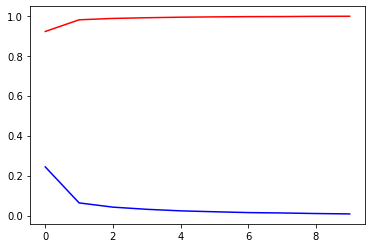

In [110]:
import matplotlib.pyplot as plt

accuracy=model.history.history['accuracy']
loss=model.history.history['loss']

epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'r')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

Testing


Predicted output: 9


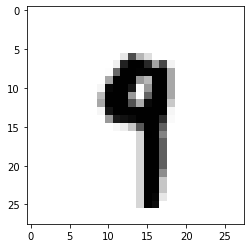

In [103]:
image_index=50
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output:",pred.argmax())

In [113]:
score=model.evaluate(x_test,y_test)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

383/383 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9904
Test loss: 0.05718820169568062
Test accuracy: 0.9904489517211914


Predicted output: 1


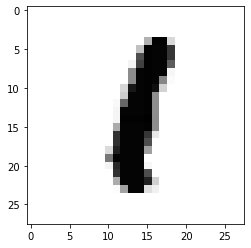

In [92]:
image_index=0
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output:",pred.argmax())

In [ ]:
model.save('model.h5')
print("Saved model to disk")

Saved model to disk
